In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df=pd.read_csv("TV_Sales.csv")
df

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181
...,...,...
4567,26.0,94.685866
4568,71.0,249.101915
4569,44.0,163.631457
4570,71.0,253.610411


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [4]:
df.shape

(4572, 2)

In [5]:
df.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [6]:
df.isnull().sum()

TV       10
Sales     6
dtype: int64

In [7]:
df["TV"].describe()

count    4562.000000
mean       54.066857
std        26.125054
min        10.000000
25%        32.000000
50%        53.000000
75%        77.000000
max       100.000000
Name: TV, dtype: float64

In [8]:
df["TV"].dropna(inplace=True)
df.head()

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181


In [9]:
df["Sales"].dropna(inplace=True)

In [10]:
df.isnull().sum()

TV       10
Sales     6
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

In [13]:
df.sample(10)

,TV,Sales
199,11.0,45.552511
803,46.0,169.403570
1901,76.0,266.942186
2940,18.0,67.580622
3490,92.0,327.818253
727,62.0,219.235241
1873,68.0,242.521939
532,35.0,123.552959
3028,84.0,298.372065
1678,96.0,343.302666


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [15]:
x=df[["TV"]].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [16]:
y=df[["Sales"]].values
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
x=sc.fit_transform(x)
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

In [20]:
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [22]:
model=LinearRegression()

In [23]:
model.fit(x_train,y_train)

LinearRegression()

In [24]:
model.coef_

array([[92.9890112]])

In [25]:
model.intercept_

array([192.43260955])

In [26]:
train_score =model.score(x_train,y_train)*100
train_score

99.89945329945171

In [27]:
test_score =model.score(x_test,y_test)*100
test_score

99.89974160292293

In [28]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
r2= r2_score(y_test,model.predict(x_test))
r2

0.9989974160292293

In [30]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

2.363243117039462

In [31]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

8.610468010474161

In [32]:
y_pred=model.predict(x)
y_pred

array([[ 56.87703178],
       [ 46.19440377],
       [145.89893187],
       ...,
       [156.58155988],
       [252.72521198],
       [149.45980788]])

In [33]:
op=pd.DataFrame(zip(y,y_pred),columns=("actual",'predicted'),dtype=float)
op

,actual,predicted
0,54.732757,56.877032
1,46.677897,46.194404
2,150.177829,145.898932
3,298.246340,295.455724
4,56.594181,53.316156
...,...,...
4551,94.685866,92.485792
4552,249.101915,252.725212
4553,163.631457,156.581560
4554,253.610411,252.725212


In [34]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='actual', ylabel='predicted'>

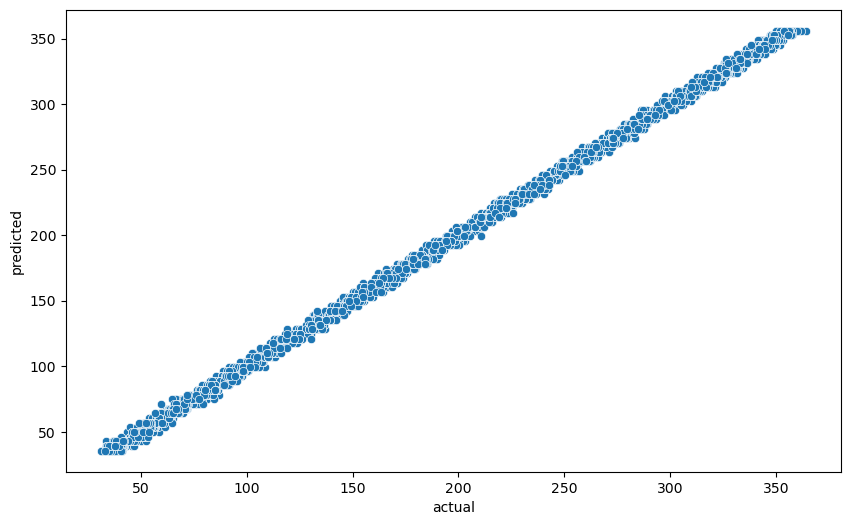

In [39]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.scatterplot(data=op,x='actual',y="predicted")

<AxesSubplot:xlabel='actual', ylabel='predicted'>

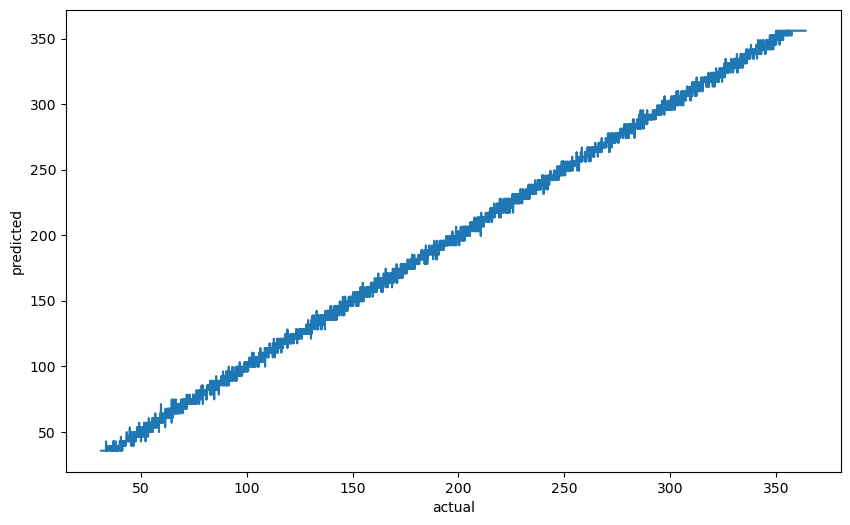

In [43]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.lineplot(data=op,x='actual',y="predicted")